### Data Wrangling

#### Importing Libraries

In [1]:
# Import libraries for EDA analysis
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import Dropdown, interact, IntText
import plotly.express as px
import matplotlib.ticker as ticker
import datetime as dt
from datetime import datetime
import calendar
import pingouin
import warnings
import os
import joblib
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns", None)

#### Loading Dataset

In [2]:
# Read csv file with pandas
path = "C:/Users/USER/Documents/macQaries/bank/data/train.csv"
train = pd.read_csv(path, sep = ";")

#### Data Cleaning

In [3]:
df = train.copy()

In [4]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
df.shape

(45211, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
# Display features with missing values
missingdfsum = df.isnull().sum()
missingdfpercent = round(missingdfsum/len(df)*100, 1)
missingdf = pd.concat([missingdfsum, missingdfpercent], axis = 1)
missingdf.columns = ["missing_counts", "missing_percent"]
missingdf

missing_counts  missing_percent
age                     0              0.0
job                     0              0.0
marital                 0              0.0
education               0              0.0
default                 0              0.0
balance                 0              0.0
housing                 0              0.0
loan                    0              0.0
contact                 0              0.0
day                     0              0.0
month                   0              0.0
duration                0              0.0
campaign                0              0.0
pdays                   0              0.0
previous                0              0.0
poutcome                0              0.0
y                       0              0.0

In [9]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [10]:
# Define a function for listing categorical variables so we check for consistency
def category(df):
    cat_list = []
    for x in df.columns:
        if df[x].dtypes == "object":
            cat_list.append(x)
    return cat_list

In [11]:
# Print unique values for categorical variables
cat_list = category(df)
for col in cat_list:
    print(f"{col} \n {df[col].unique()} \n {'_'*100} \n")

job 
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 
 ____________________________________________________________________________________________________ 

marital 
 ['married' 'single' 'divorced'] 
 ____________________________________________________________________________________________________ 

education 
 ['tertiary' 'secondary' 'unknown' 'primary'] 
 ____________________________________________________________________________________________________ 

default 
 ['no' 'yes'] 
 ____________________________________________________________________________________________________ 

housing 
 ['yes' 'no'] 
 ____________________________________________________________________________________________________ 

loan 
 ['no' 'yes'] 
 ____________________________________________________________________________________________________ 

contact 
 ['unknown' 'cellular' 'telephone'] 
 __

In [12]:
# Print value counts for all features
columns = df.columns.tolist()
for col in columns:
    print(f"{col} \n")
    print(f"{df[col].value_counts()} \n {'_'*100} \n")

age 

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64 
 ____________________________________________________________________________________________________ 

job 

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64 
 ____________________________________________________________________________________________________ 

marital 

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64 
 ____________________________________________________________________________________________________ 

education 

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: 

In [13]:
# Check for inaccuracies in age
df.sort_values(by = "age", ascending = False).head()

age      job   marital  education default  balance housing loan  \
41663   95  retired   married  secondary      no        0      no   no   
33699   95  retired  divorced    primary      no     2282      no   no   
31233   94  retired  divorced  secondary      no     1234      no   no   
44420   93  retired   married    unknown      no      775      no   no   
44262   93  retired   married    unknown      no      775      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
41663  telephone    1   oct       215         1     -1         0  unknown   no  
33699  telephone   21   apr       207        17     -1         0  unknown  yes  
31233   cellular    3   mar       212         1     -1         0  unknown   no  
44420   cellular    4   aug       476         2     13         9  success  yes  
44262   cellular   22   jul       860         2    177         7  success  yes

In [14]:
# Drop unwanted features
columns_to_drop = ["poutcome", "pdays", "day"]
df.drop(columns = columns_to_drop, inplace = True)

In [15]:
df["y"] = df["y"].map({'yes': 1, 'no': 0})

In [16]:
df.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   
y         45211.0     0.116985     0.321406     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
duration    4918.0  
campaign      63.0  
previous     275.0  
y              1.0

75% of the bank clients are below 50 years.

The Balance column has a very high standard deviation and huge outliers values.

The Duration column has outilers values with a very high standard deviation which surpasses the median value. This column also shows that 50% customers contacted had a contact duration of at least 180seconds.  

The Campaign column has a very high standard deviation and huge outliers values. It also shows that 75% of customers were contacted at least 3 times during the campaign

The Previous column shows that, at least 75% of the bank costumers were never contacted before this campaign.

The y column shows that over 75% of our customer dataset did not subscribe

In [17]:
df.info()                                               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  y          45211 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 4.8+ MB


### Exploratory Analysis

In [18]:
# Copy Original dataset to df_exp
df_exp = df.copy()

In [19]:
df_exp.corr("pearson", numeric_only = True).style.background_gradient(axis = None)

There is no significant correlation between the numeric variables

In [20]:
# Function for categorical features plot
def count_plot(y, col = "b", ax = None):
    y_counts = (df_exp.loc[:, y].astype("str")
                .value_counts()
                .reset_index()
                .assign(percent = lambda x: (round(x["count"]/x["count"]
                                                 .sum()*100, 0))))
    sns.set_context("paper")
    ax0 = sns.barplot(
        data = y_counts,
        x = "percent",
        y = y,
        color = col,
        ax = ax,
        order = y_counts[y],
    )
    values = ax0.containers[0].datavalues
    labels = ["{:g}%".format(val) for val in values]
    ax0.bar_label(ax0.containers[0], labels = labels, fontsize = 9, color = "#740405")
    ax0.set_ylabel("")
    ax0.set_xlabel("Percent", fontsize = 10)
    ax0.set_title(str.title(y) + " | Proportions ", fontsize = 10)
    
    return

### Job, Marital, Education, and Default Distribution

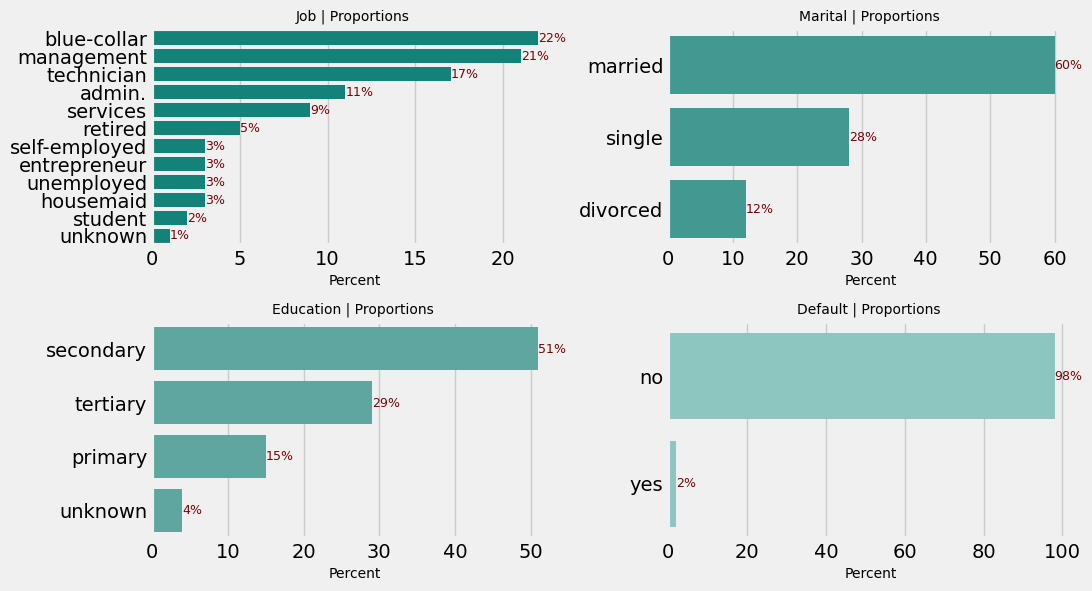

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(11, 6))
count_plot("job", ax = axes[0, 0], col = "#009688")
count_plot("marital", ax = axes[0, 1], col = "#35a79c")
count_plot("education", ax = axes[1, 0], col = "#54b2a9")
count_plot("default", ax = axes[1, 1], col = "#83d0c9")
plt.tight_layout()
plt.show()

Blue-collar, Management, and Technicians represent 60% of customers' occupation in our dataset.

60% of our customers are Married, 28% are Single, while 12% are Divorced.

More than 50% of our customers have Secondary degree and almost 30% have Tertiary degree.

More than 95% of our data represents people that have never Defaulted.

### Housing, Contact, Loan, Month Distribution

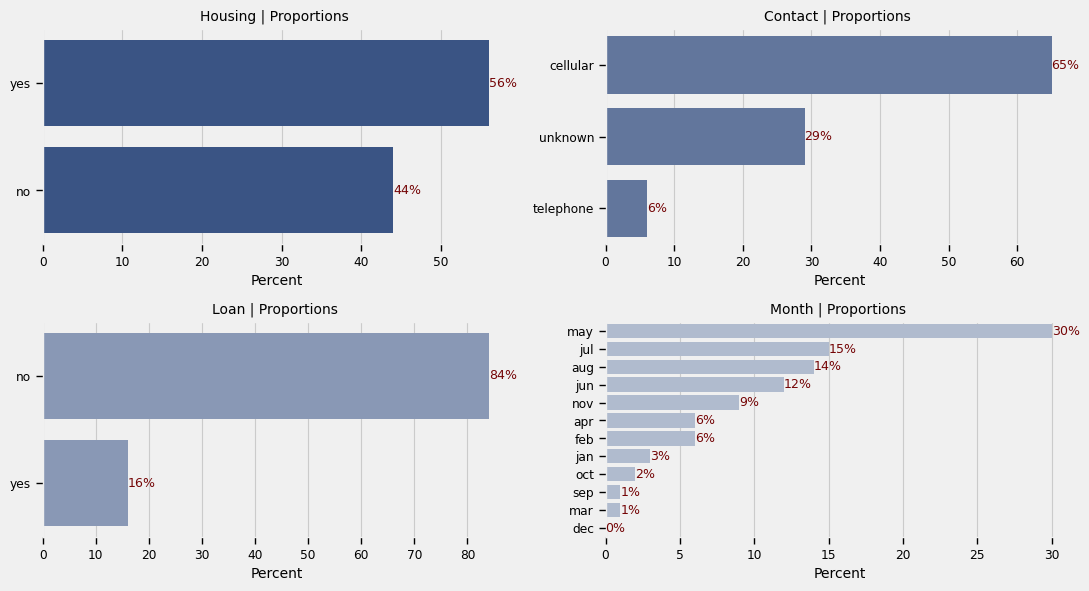

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(11, 6))
count_plot("housing", ax = axes[0, 0], col = "#2e5090")
count_plot("contact", ax = axes[0, 1], col = "#5873a6")
count_plot("loan", ax = axes[1, 0], col = "#8296bc")
count_plot("month", ax = axes[1, 1], col = "#abb9d3")
plt.tight_layout()
plt.show()

More than 50% of our data have housing loan.

Customers contacted through cellular means are more than 60% of our dataset.

More than 80% of our data doesn't have personal loan.

Customers that were last contacted in may, make up for 30% of our entire dataset

### Target Feature Distribution

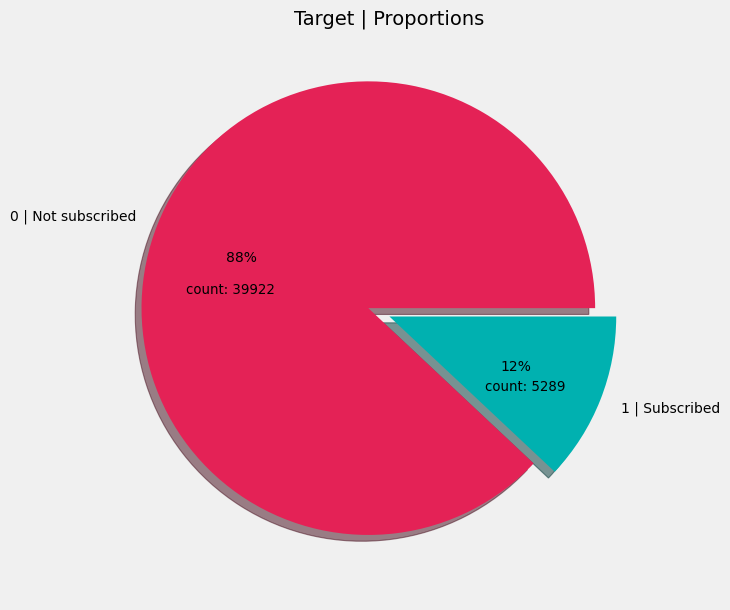

In [23]:
plt.figure(figsize = (7, 7))
y_counts = (df_exp.loc[:, "y"]
                .value_counts()
                .reset_index()
                .assign(percent = lambda x: (round(x["count"]/x["count"]
                                                 .sum()*100, 0))))
color = sns.color_palette(["#e42256", "#00b1b0"])
plt.pie(x = y_counts["percent"],
        labels = ["0 | Not subscribed", "1 | Subscribed"],
        colors = color,
        autopct = "%.0f%%",
        shadow = True,
        textprops = {"fontsize": 10, "color": "#000000"},
        explode = [0.1, 0],
       )
plt.title("Target | Proportions", fontsize = 14)
plt.text(
    x = -.7,
    y = .12,
    s = "count: " + str(y_counts.iloc[0, 1]) + "",
    color = "black",
    ha = "center",
    va = "center"
)
plt.text(
    x = .6,
    y = -.31,
    s = "count: " + str(y_counts.iloc[1, 1]) + "",
    color = "black",
    ha = "center",
    va = "center"
)
plt.show()

Over 80% of our customers did not subscribe a term deposit. This target variable is highly imbalanced, this will impact perfomance of our model. This can be fixed using Over sampling methods

In [24]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  y          45211 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 4.8+ MB


### Numerical Features Distribution

In [25]:
# Create a transformation helper function
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
def cbrt_trans(x, inverse = False):
    if not inverse:
        return np.cbrt(x)
    else:
        return np.power(x, 3)

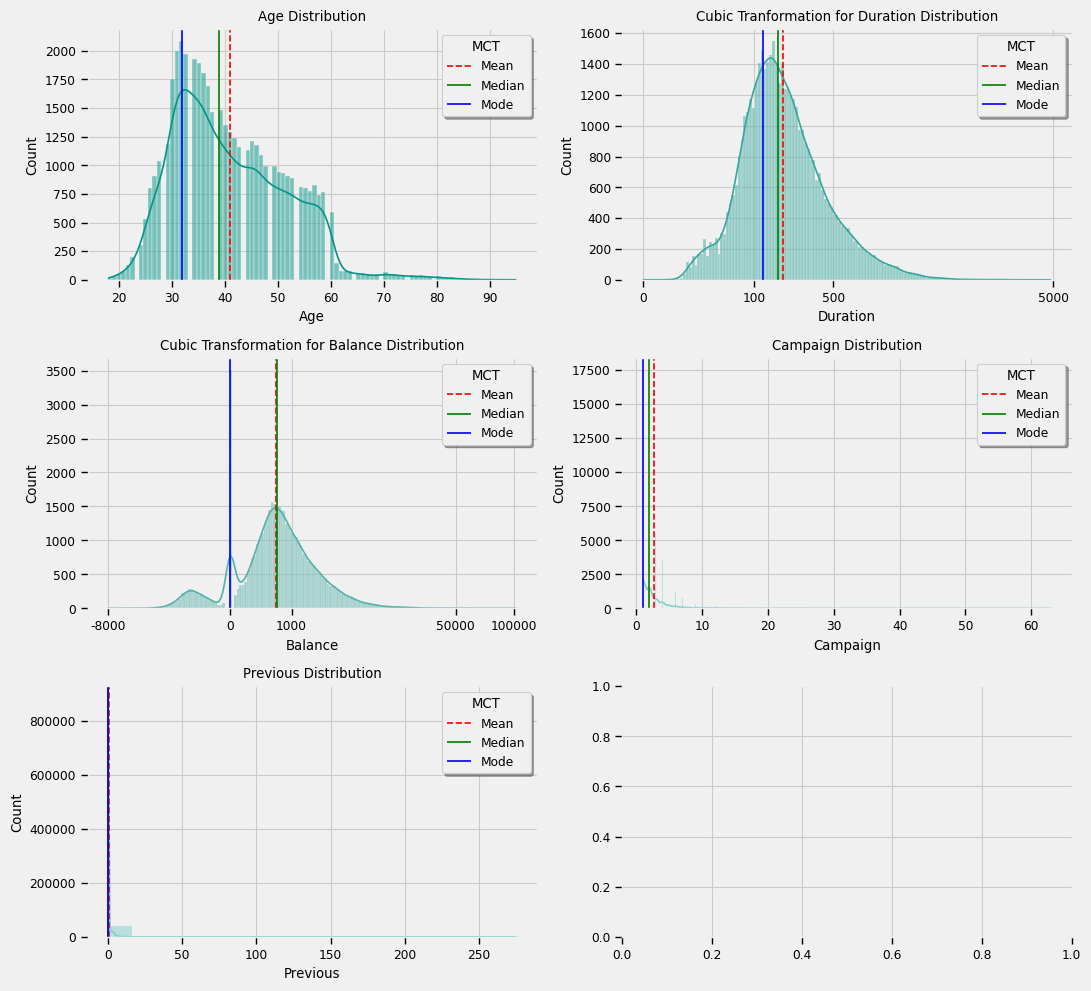

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(11, 10))
mean = df_exp['age'].mean()
median = df_exp['age'].median()
mode = df_exp['age'].mode().values[0]
sns.histplot(x = "age", data = df_exp, kde = True, ax = axes[0, 0], color = "#009688")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_title("Age Distribution")
axes[0, 0].axvline(mean, color='r', linestyle='--', label="Mean")
axes[0, 0].axvline(median, color='g', linestyle='-', label="Median")
axes[0, 0].axvline(mode, color='b', linestyle='-', label="Mode")
axes[0, 0].legend(title="MCT", loc="best", shadow=True)

df_exp["durationn"] = df_exp["duration"].apply(cbrt_trans)
mean = df_exp['durationn'].mean()
median = df_exp['durationn'].median()
mode = df_exp['durationn'].mode().values[0]
sns.histplot(x = "durationn", data = df_exp, kde = True, ax = axes[0, 1], color = "#35a79c")
tick = [0, 100, 500, 5000]
axes[0, 1].set_xticks(cbrt_trans(tick), tick)
axes[0, 1].set_xlabel("Duration")
axes[0, 1].set_title("Cubic Tranformation for Duration Distribution")
axes[0, 1].axvline(mean, color='r', linestyle='--', label="Mean")
axes[0, 1].axvline(median, color='g', linestyle='-', label="Median")
axes[0, 1].axvline(mode, color='b', linestyle='-', label="Mode")
axes[0, 1].legend(title="MCT", loc="best", shadow=True)

df_exp["balancee"] = df_exp["balance"].apply(cbrt_trans)
mean = df_exp['balancee'].mean()
median = df_exp['balancee'].median()
mode = df_exp['balancee'].mode().values[0]
sns.histplot(x = "balancee", data = df_exp, kde = True, ax = axes[1, 0], color = "#54b2a9")
tick = [-8000, 0, 1000, 50000, 100000]
axes[1, 0].set_xticks(cbrt_trans(tick), tick)
axes[1, 0].set_xlabel("Balance")
axes[1, 0].set_title("Cubic Transformation for Balance Distribution")
axes[1, 0].axvline(mean, color='r', linestyle='--', label="Mean")
axes[1, 0].axvline(median, color='g', linestyle='-', label="Median")
axes[1, 0].axvline(mode, color='b', linestyle='-', label="Mode")
axes[1, 0].legend(title="MCT", loc="best", shadow=True)

mean = df_exp['campaign'].mean()
median = df_exp['campaign'].median()
mode = df_exp['campaign'].mode().values[0]
sns.histplot(x = "campaign", data = df_exp, kde = True, ax = axes[1, 1], color = "#83d0c9")
axes[1, 1].set_xlabel("Campaign")
axes[1, 1].set_title("Campaign Distribution")
axes[1, 1].axvline(mean, color='r', linestyle='--', label="Mean")
axes[1, 1].axvline(median, color='g', linestyle='-', label="Median")
axes[1, 1].axvline(mode, color='b', linestyle='-', label="Mode")
axes[1, 1].legend(title="MCT", loc="best", shadow=True)

mean = df_exp['previous'].mean()
median = df_exp['previous'].median()
mode = df_exp['previous'].mode().values[0]
sns.histplot(x = "previous", data = df_exp, kde = True, ax = axes[2, 0], color = "#83d0c9")
axes[2, 0].set_xlabel("Previous")
axes[2, 0].set_title("Previous Distribution")
axes[2, 0].axvline(mean, color='r', linestyle='--', label="Mean")
axes[2, 0].axvline(median, color='g', linestyle='-', label="Median")
axes[2, 0].axvline(mode, color='b', linestyle='-', label="Mode")
axes[2, 0].legend(title="MCT", loc="best", shadow=True)
plt.tight_layout()
plt.show()

In [27]:
pingouin.normality(df["age"], method = "shapiro", alpha = 0.05)

W  pval  normal
age  0.960546   0.0   False

The age feature with a 40.936210 mean value, 10.618762 standard deviation value, 39.0 median value which appears to have a normal distribution from our graph is actually not normally distributed. The age group is between 20 and 60

The duration feature has a peak between 100 and 300 seconds

75% of our data has less than 1428 balance. There are also customers with less than 0 balance. With the mode centered around zero, it means, most of the customers have near zero balance.

Most of our customers were contacted less than 5 times during this campaign

75% of our customers have never been contacted prior to this campaign

### Categorical Features and Target Feature

In [28]:
# Function for categorical features and target feature plot
def counts_plot(x, ax = None):
    x_counts = (df_exp.groupby([df_exp.loc[:, x], 'y'])['loan']
                .count()
                .unstack())
    sns.set_context("paper")
    ax0 = x_counts.plot.bar(ax = ax, color = ["#e42256", "#00b1b0"])
    ax0.set_xticks(range(len(x_counts)))
    ax0.set_xticklabels(x_counts.index, rotation=60)
    ax0.set_title(str.title(x), fontsize = 15)
    ax0.set_xlabel(x, fontsize=10)
    ax0.set_ylabel("Counts", fontsize = 10)
    ax0.yaxis.set_major_formatter(ticker.EngFormatter())
    ax0.legend(
        title="Subscribed?", loc="best", labels = ["NO", "YES"], ncol=2, shadow=True, title_fontsize = 8, prop = {"size": 7},bbox_to_anchor = (1.18, 1.25)
    )
    
    return

# Function for the mean of target value
def mean_plot(x, ax = None):
    mpt = df_exp.groupby(x, as_index = False)["y"].mean().sort_values("y", ascending = False)
    sns.set_context("paper")
    ax0 = sns.barplot(data = mpt, x = x, y = "y", ax = ax, color = "#00b1b0")
    ax0.set_xticks(range(len(mpt)))
    ax0.set_xticklabels(mpt[x], rotation=60)
    ax0.set_title(str.title(x), fontsize = 15)
    ax0.set_xlabel(str.title(x), fontsize=10)
    ax0.set_ylabel("Mean", fontsize = 10)
    
    return

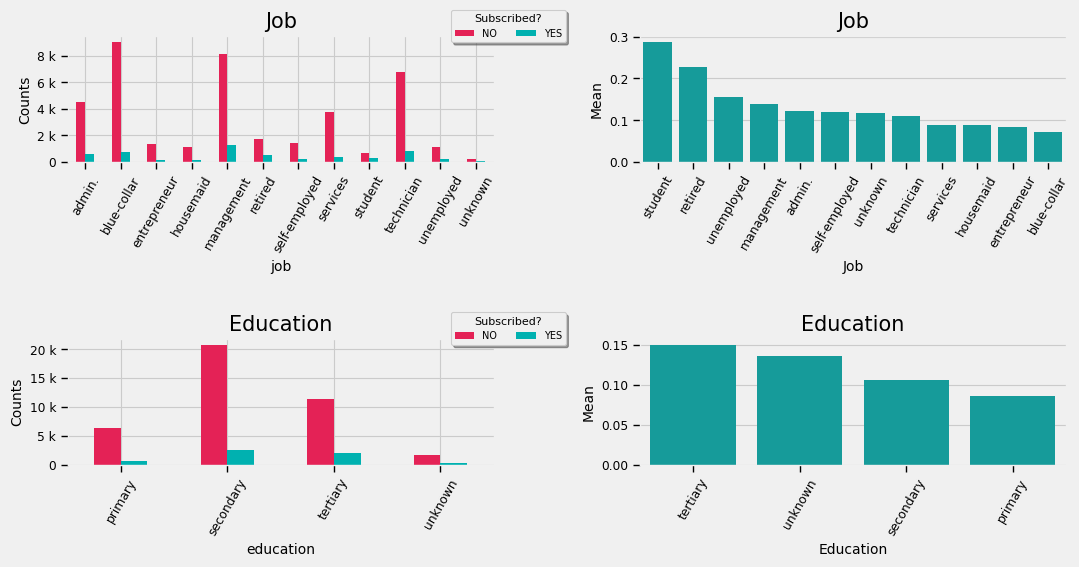

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(11, 6))
counts_plot("job", ax = axes[0, 0])
mean_plot("job", ax = axes[0, 1])
counts_plot("education", ax = axes[1, 0])
mean_plot("education", ax = axes[1, 1])
plt.tight_layout()
plt.show()

The bank was interested more on people with professional occupation. Blue-collar, Management, and Technicians represent 60% of customers' occupation in our dataset. On average, Students, and Retired demographics makes up above 20% response rate each. Blue-collar demographic tend to have the least response rate below 10%.

The bank made more contact with people with Secondary education demographic, followed by Tertiary and then Primary. The response rate for this demographic increases with the level of education, with Tertiary education having above 10%, followed by Secondary, and the least which is Primary

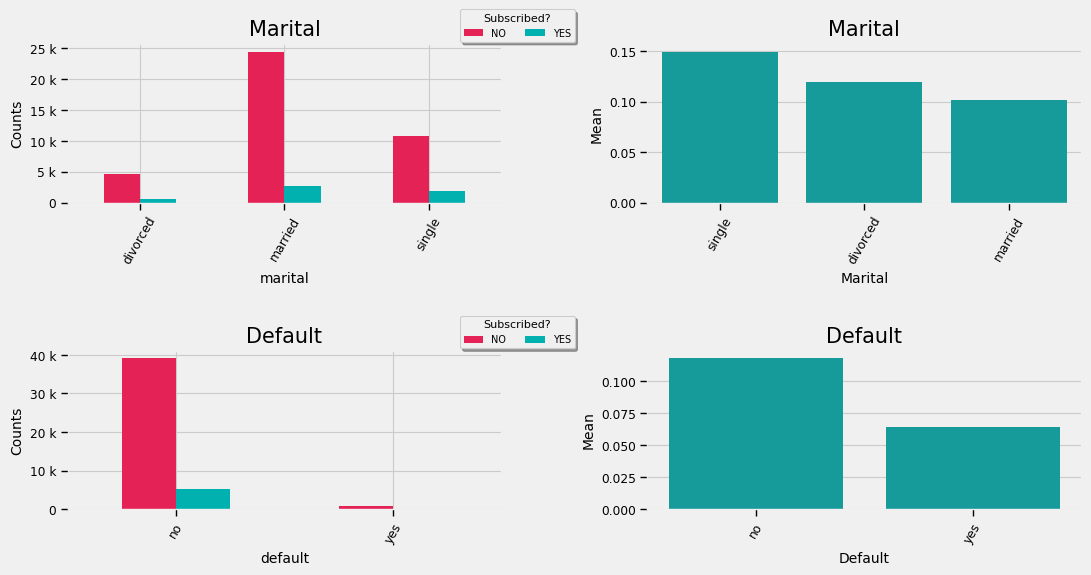

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(11, 6))
counts_plot("marital", ax = axes[0, 0])
mean_plot("marital", ax = axes[0, 1])
counts_plot("default", ax = axes[1, 0])
mean_plot("default", ax = axes[1, 1])
plt.tight_layout()
plt.show()

The bank was interested more on Married people and Single than Divorced. But on average, Single individuals have a higher response rate followed by Divorced individuals.

The bank made more contact with non defaulters than defaulters and in terms of response rate, non defaulters tends to be higher compared to defaulters

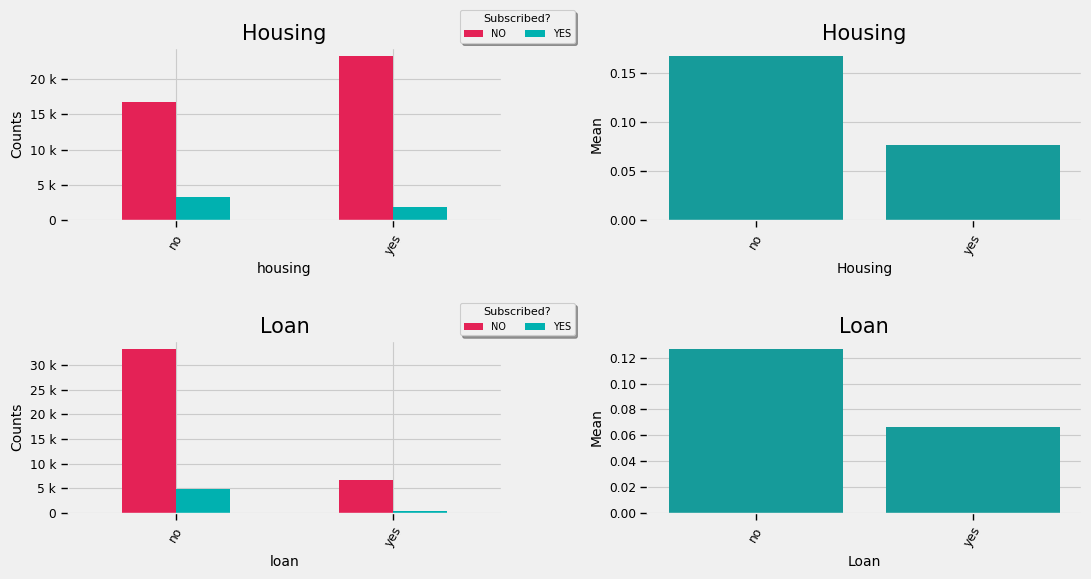

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(11, 6))
counts_plot("housing", ax = axes[0, 0])
mean_plot("housing", ax = axes[0, 1])
counts_plot("loan", ax = axes[1, 0])
mean_plot("loan", ax = axes[1, 1])
plt.tight_layout()
plt.show()

There are more individuals with a Housing loan that were contacted by the bank. Individuals who do not have a Housing loan tend to have a higher response rate compared to those with a Housing loan.

More individuals without a personal loan were contacted by the bank. These individuals without any loans tend have a higher response rate compared to those with personal loans

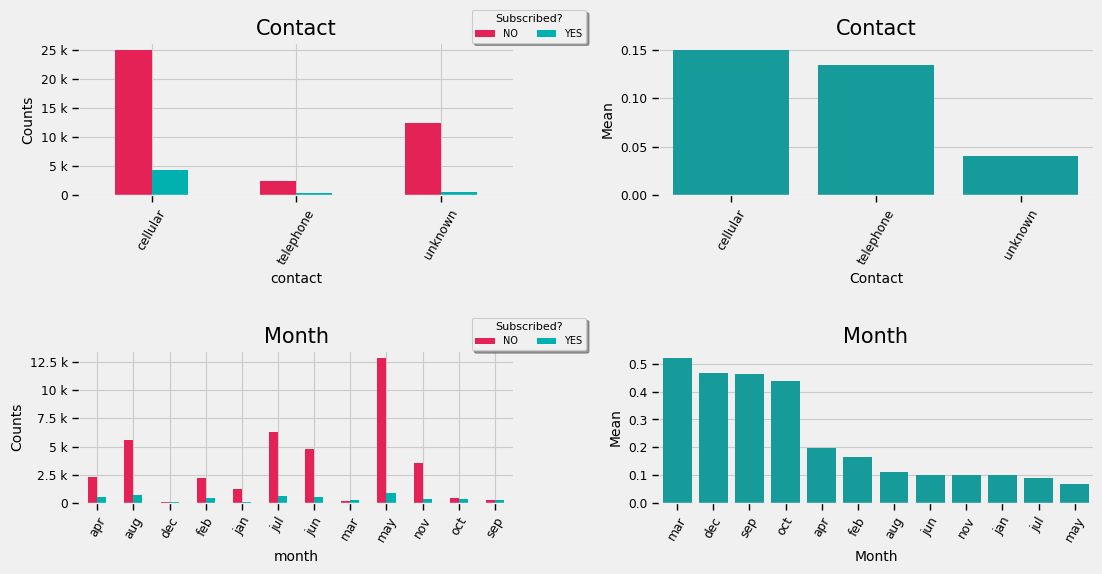

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(11, 6))
counts_plot("contact", ax = axes[0, 0])
mean_plot("contact", ax = axes[0, 1])
counts_plot("month", ax = axes[1, 0])
mean_plot("month", ax = axes[1, 1])
plt.tight_layout()
plt.show()

Individuals who received Cellular or Telephone calls have a higher chance of responding to the services.

The bank made most of its contact in May, July, August, and June. In terms of response rate, these months with higher contact had less response rates, and the months with lower contacts, March, December, September, and October had higher response rates.

### PairPlot showing the Distribution and Correlation of Numerical Features (1% of entire dataset) with Target Variable

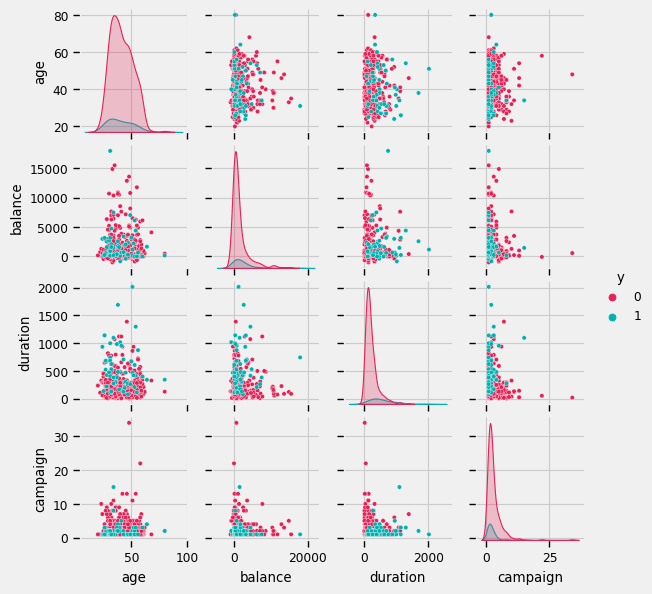

In [33]:
num_vars = df_exp[["age", "balance", "duration", "campaign", "y"]]
num = num_vars.groupby("y", group_keys = False).apply(lambda x: x.sample(frac = 0.01))
sns.pairplot(
    num,
    hue = "y",
    kind = "scatter",
    diag_kind = "kde",
    palette = color,
    height = 1.5,
    aspect = 1,
    plot_kws = dict(s = 10),
)
plt.show()

### Age, Balance, Duration , and Campaign Features

In [34]:
def num_vars(var1, var2, box = True):
    var1_var2 = df_exp[[var1, var2, "y"]]
    var1_var2["y"] = var1_var2["y"].astype("str")
    
    if box:
        fig, axes = plt.subplots(2, 2, figsize=(10, 6))
        axes = axes.reshape(2, 2)  # Reshape to make it a 2D

        sns.histplot(
            data = var1_var2,
            kde = True,
            line_kws = {"lw": 1.5, "alpha": 0.6},
            x = var1,
            bins = 20,
            hue = "y",
            palette = color,
            alpha = 0.6,
            ax = axes[0, 0],
        )
        axes[0, 0].legend(
            title = "Subscribed?",
            loc = "upper right",
            labels = ["YES", "NO"],
            ncol = 2,
            frameon = True,
            shadow = True,
            title_fontsize = 8,
            prop = {"size": 7},
            bbox_to_anchor = (1.18, 1.25),
        )
        axes[0, 0].set_xlabel(str.title(var1), fontsize = 10)
        axes[0, 0].set_ylabel("Frequency", fontsize = 10)
        axes[0, 0].set_title(str.title(var1) + " distributions", fontsize = 12)
        axes[0, 0].yaxis.set_major_formatter(ticker.EngFormatter())

        sns.scatterplot(
            data = var1_var2,
            x = var1,
            y = var2,
            hue = "y",
            palette = color,
            alpha = 0.6,
            ax = axes[0, 1],
            legend = False,
        )
        axes[0, 1].set_xlabel(str.title(var1), fontsize = 10)
        axes[0, 1].set_ylabel(str.title(var2), fontsize = 10)
        axes[0, 1].set_title(str.title(var2) + " distributions", fontsize = 12)
        axes[0, 1].yaxis.set_major_formatter(ticker.EngFormatter())

        sns.boxplot(data = var1_var2, x = var1, y = "y", ax = axes[1, 0], palette = color, notch = True,
                    showcaps = False, flierprops =  {"marker": "x"}, medianprops = {"color": "w", "linewidth": 1}
                   )
        axes[1, 0].set_yticks([0, 1], ["NO", "YES"])
    
    else:
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        axes = axes.reshape(1, 2)  # Reshape to make it a 2D

        sns.histplot(
            data = var1_var2,
            kde = True,
            line_kws = {"lw": 1.5, "alpha": 0.6},
            x = var1,
            bins = 20,
            hue = "y",
            palette = color,
            alpha = 0.6,
            ax = axes[0, 0],
        )
        axes[0, 0].legend(
            title = "Subscribed?",
            loc = "upper right",
            labels = ["YES", "NO"],
            ncol = 2,
            frameon = True,
            shadow = True,
            title_fontsize = 8,
            prop = {"size": 7},
            bbox_to_anchor = (1.18, 1.25),
        )
        axes[0, 0].set_xlabel(str.title(var1), fontsize = 10)
        axes[0, 0].set_ylabel("Frequency", fontsize = 10)
        axes[0, 0].set_title(str.title(var1) + " distributions", fontsize = 12)
        axes[0, 0].yaxis.set_major_formatter(ticker.EngFormatter())

        sns.scatterplot(
            data = var1_var2,
            x = var1,
            y = var2,
            hue = "y",
            palette = color,
            alpha = 0.6,
            ax = axes[0, 1],
            legend = False,
        )
        axes[0, 1].set_xlabel(str.title(var1), fontsize = 10)
        axes[0, 1].set_ylabel(str.title(var2), fontsize = 10)
        axes[0, 1].set_title(str.title(var2) + " distributions", fontsize = 12)
        axes[0, 1].yaxis.set_major_formatter(ticker.EngFormatter())
    return

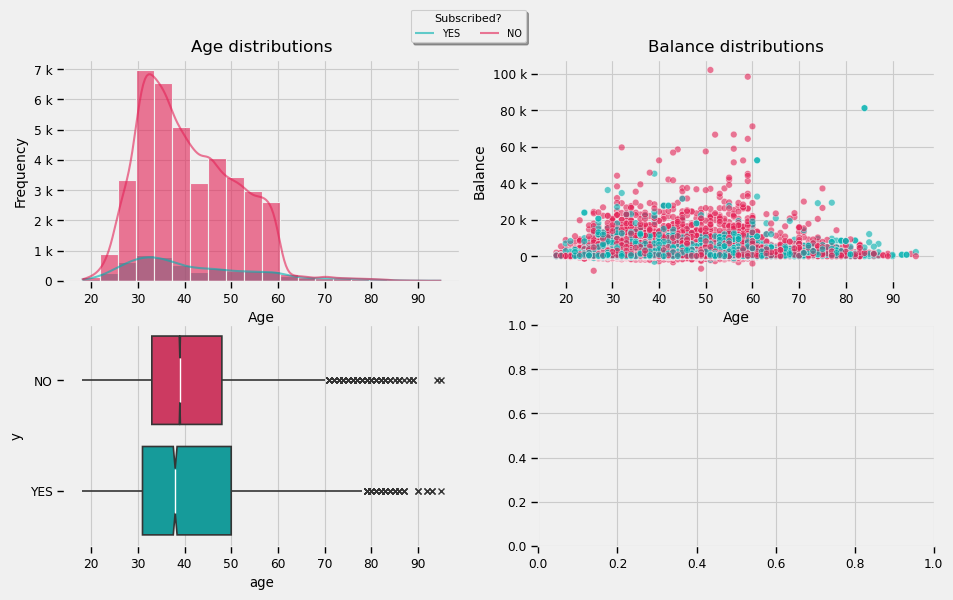

In [35]:
num_vars("age", "balance")

The age feature further shows that clients in the ages between 30 and 50 are more susceptible to the marketing campaigns, hence tend to subscribe for a term deposit.

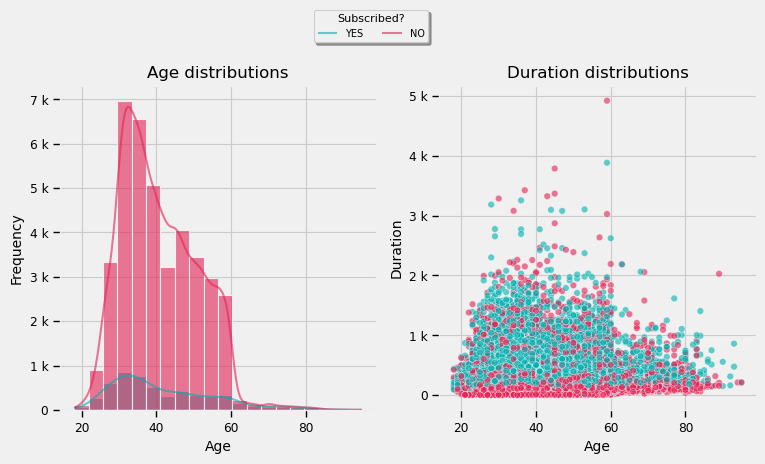

In [36]:
num_vars("age", "duration", box = False)

The duration feature further shows that the more the contact duration, the more susceptible are the client to the marketing campaigns, hence tend to subscribe for a term deposit.

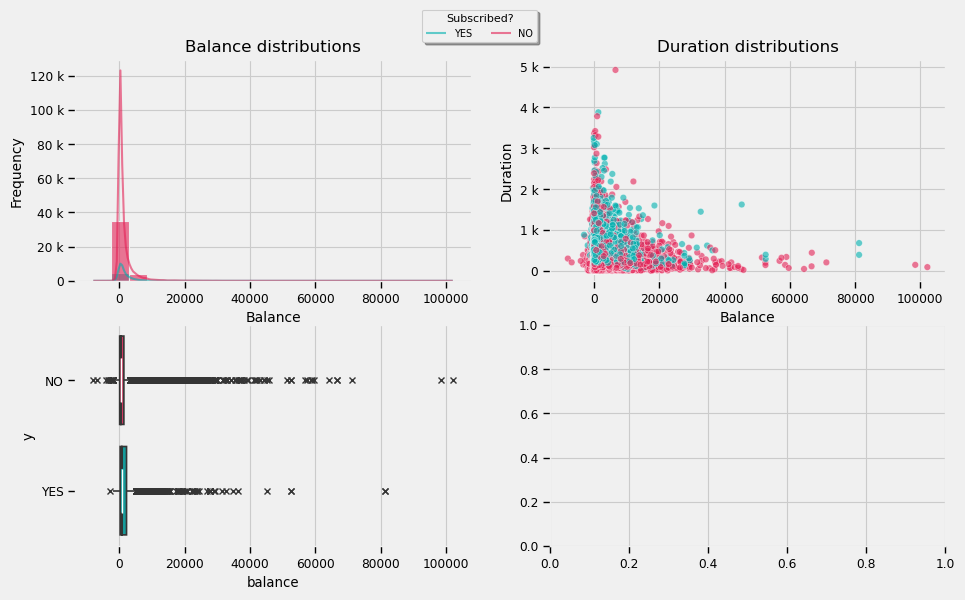

In [37]:
num_vars("balance", "duration")

The balance feature further shows that clients with a near zero balance (less than 10k) are more susceptible to the marketing campaigns, hence tend to subscribe for a term deposit.

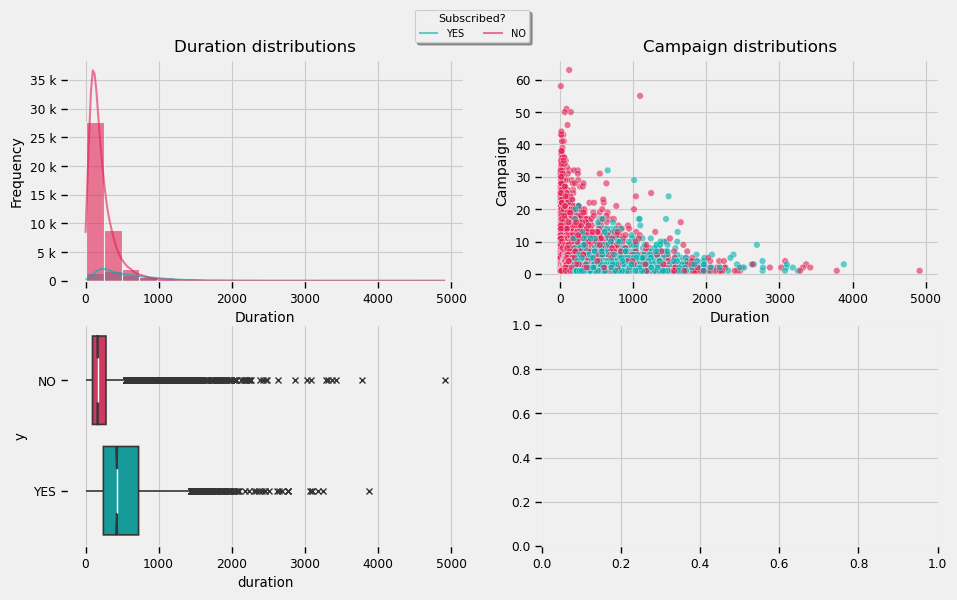

In [38]:
num_vars("duration", "campaign")

Still on the duration feature, we can see from our boxplot that when the duration was between 0 and 100 seconds, most of the clients did not subscribe. The more seconds spent on clients with range of over a hundred seconds yielded a positive response from clients.

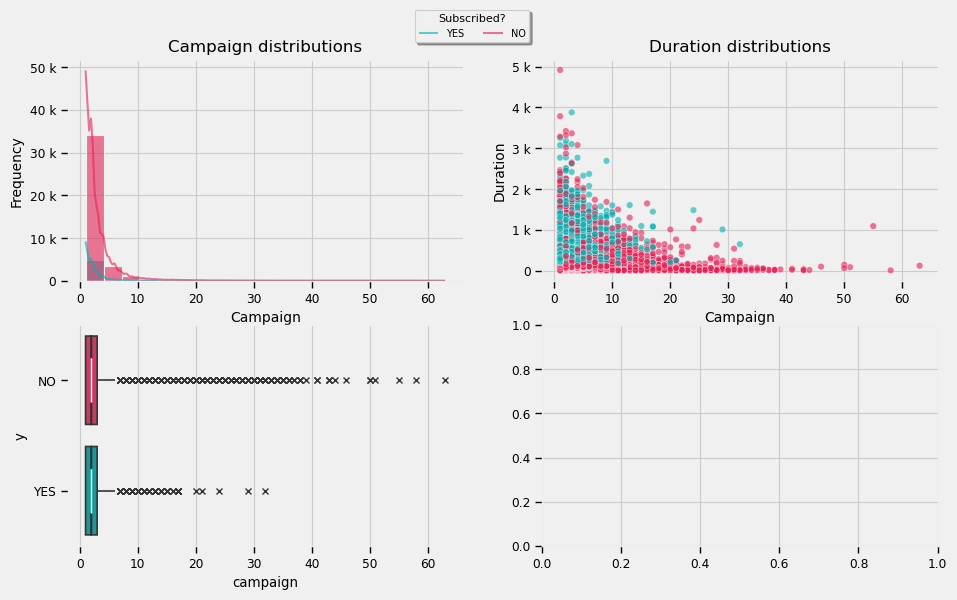

In [39]:
num_vars("campaign", "duration")

Clients who were contacted a few times were the ones who decided to subscribe a deposit term.

#### Feature Selection 1: Numerical Input

#### Method: ANOVA and Correlation Test

In [40]:
df_fsel = df.copy()

In [41]:
df_fsel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  y          45211 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 4.8+ MB


In [42]:
cat = df_fsel.select_dtypes("object").columns
num = df_fsel.select_dtypes("int").columns
df_tar = df_fsel["y"]
df_cat = df_fsel[cat]
df_num = df_fsel[num]
df_cat = pd.concat([df_cat, df_tar], axis = 1)

In [43]:
df_cat.shape, df_num.shape

((45211, 9), (45211, 6))

In [44]:
df_num.head()

age  balance  duration  campaign  previous  y
0   58     2143       261         1         0  0
1   44       29       151         1         0  0
2   33        2        76         1         0  0
3   47     1506        92         1         0  0
4   33        1       198         1         0  0

In [45]:
df_cat.head()

job  marital  education default housing loan  contact month  y
0    management  married   tertiary      no     yes   no  unknown   may  0
1    technician   single  secondary      no     yes   no  unknown   may  0
2  entrepreneur  married  secondary      no     yes  yes  unknown   may  0
3   blue-collar  married    unknown      no     yes   no  unknown   may  0
4       unknown   single    unknown      no      no   no  unknown   may  0

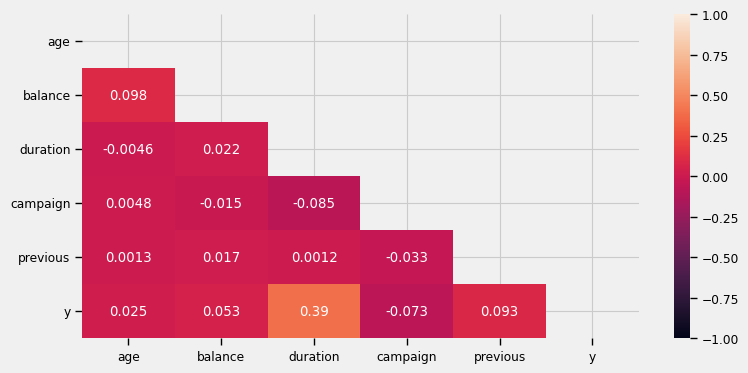

In [46]:
# Correlation Test
plt.figure(figsize = (8, 4))
mask = np.triu(np.ones_like(df_num.corr(), dtype = bool))
sns.heatmap(df_num.corr(), vmin = -1, vmax = 1, mask = mask, annot = True)
plt.show()

There is no multicollearity between independent variables

In [47]:
# Lets compute the skewness of the numeric features
df_num.skew()

age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
previous    41.846454
y            2.383480
dtype: float64

In [48]:
# Lets determine the volume of the outlier
df_num.kurtosis()

age            0.319570
balance      140.751547
duration      18.153915
campaign      39.249651
previous    4506.860660
y              3.681142
dtype: float64

In [50]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, PowerTransformer, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import chi2, f_classif 
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, auc, confusion_matrix, precision_score, f1_score, ConfusionMatrixDisplay, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

In [51]:
x = df_num[df_num.columns[:-1]]
y = df_num[df_num.columns[-1]]

x = MinMaxScaler().fit_transform(x)
#ANOVA
f_score, p_value = f_classif(x, y)
for i in range(len(df_num.columns[:-1])):
    print(df_num.columns[:-1][i], ":", p_value[i])

age : 8.82564369173634e-08
balance : 2.521113691910737e-29
duration : 0.0
campaign : 1.0123473643070218e-54
previous : 7.801830349573926e-88


p-value < 0.05 shows the significance of all numerical features

#### Feature Selection 1: Categorical input

#### Method: Chi-Squared Test

In [52]:
x = df_cat[df_cat.columns[:-1]]
y = df_cat[df_cat.columns[-1]]

for col in df_cat.columns[:-1]:
    x[col] = LabelEncoder().fit_transform(x[col])
    
x = MinMaxScaler().fit_transform(x)
#Chi2
chi_score, p_value = chi2(x, y)
for i in range(len(df_cat.columns[:-1])):
    print(df_cat.columns[:-1][i], ":", p_value[i])

job : 4.64790131874352e-05
marital : 0.00011438719484978733
education : 3.885242371080897e-08
default : 2.315276765388257e-06
housing : 1.4012848034921748e-86
loan : 2.793375244102348e-40
contact : 2.3524002410696316e-138
month : 0.04471744268774026


p-value < 0.05 shows the significance of all categorical features

### Preprocessing

In [53]:
df_pp = df.copy()

In [54]:
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  y          45211 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.4+ MB


In [55]:
train_x = df_pp.iloc[:, :-1]
train_x.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact month  duration  campaign  previous  
0  unknown   may       261         1         0  
1  unknown   may       151         1         0  
2  unknown   may        76         1         0  
3  unknown   may        92         1         0  
4  unknown   may       198         1         0

In [56]:
train_y = df_pp[["y"]]
train_y.head()

y
0  0
1  0
2  0
3  0
4  0

In [57]:
train_x.shape, train_y.shape

((45211, 13), (45211, 1))

In [58]:
train_x["education"] = train_x["education"].replace({"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3})
train_x.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married          3      no     2143     yes   no   
1   44    technician   single          2      no       29     yes   no   
2   33  entrepreneur  married          2      no        2     yes  yes   
3   47   blue-collar  married          0      no     1506     yes   no   
4   33       unknown   single          0      no        1      no   no   

   contact month  duration  campaign  previous  
0  unknown   may       261         1         0  
1  unknown   may       151         1         0  
2  unknown   may        76         1         0  
3  unknown   may        92         1         0  
4  unknown   may       198         1         0

In [59]:
# OneHot Encoding
obj_trans = train_x.select_dtypes("object").columns.tolist()
train_x = pd.get_dummies(
    train_x, prefix=obj_trans, columns=obj_trans, drop_first=True
)
train_x.head()

age  education  balance  duration  campaign  previous  job_blue-collar  \
0   58          3     2143       261         1         0                0   
1   44          2       29       151         1         0                0   
2   33          2        2        76         1         0                0   
3   47          0     1506        92         1         0                1   
4   33          0        1       198         1         0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              0               1            0   
1                 0              0               0            0   
2                 1              0               0            0   
3                 0              0               0            0   
4                 0              0               0            0   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               0   
1                  0             0            0               1   
2                  0             0            0               0   
3                  0             0            0               0   
4                  0             0            0               0   

   job_unemployed  job_unknown  marital_married  marital_single  default_yes  \
0               0            0                1               0            0   
1               0            0                0               1            0   
2               0            0                1               0            0   
3               0            0                1               0            0   
4               0            1                0               1            0   

   housing_yes  loan_yes  contact_telephone  contact_unknown  month_aug  \
0            1         0                  0                1          0   
1            1         0                  0                1          0   
2            1         1                  0                1          0   
3            1         0                  0                1          0   
4            0         0                  0                1          0   

   month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   month_may  month_nov  month_oct  month_sep  
0          1          0          0          0  
1          1          0          0          0  
2          1          0          0          0  
3          1          0          0          0  
4          1          0          0          0

In [60]:
train_x.columns

Index(['age', 'education', 'balance', 'duration', 'campaign', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [61]:
# Standardize numerical data using PowerTransformer
cols = train_x.columns.tolist()
num_trans = Pipeline(steps = [
    ("encoder", PowerTransformer()) 
])

preprocessor = ColumnTransformer(
    transformers = [
        ("", num_trans, cols)
    ]
)

pipeline = Pipeline(steps = [("preprocessor", preprocessor)])
pipe_fit = pipeline.fit(train_x)

train_data = pd.DataFrame(pipe_fit.transform(train_x), columns = train_x.columns)
print(train_data.columns)

Index(['age', 'education', 'balance', 'duration', 'campaign', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')


In [62]:
train_data

age  education   balance  duration  campaign  previous  \
0      1.473637   1.316883  0.414773  0.386077 -1.108191 -0.472500   
1      0.429379  -0.180220 -0.410774 -0.223033 -1.108191 -0.472500   
2     -0.709873  -0.180220 -0.431122 -0.923854 -1.108191 -0.472500   
3      0.683128  -2.173137  0.197685 -0.735678 -1.108191 -0.472500   
4     -0.709873  -2.173137 -0.432119  0.072812 -1.108191 -0.472500   
...         ...        ...       ...       ...       ...       ...   
45206  0.993503   1.316883 -0.052398  2.057767  0.737650 -0.472500   
45207  2.207438  -1.357301  0.275122  1.056254  0.134537 -0.472500   
45208  2.257237  -0.180220  1.495765  2.257271  1.323745  2.166630   
45209  1.409327  -0.180220 -0.114235  1.191963  1.091724 -0.472500   
45210 -0.250469  -0.180220  0.681838  0.769421  0.134537  2.175519   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0            -0.523740         -0.184415       -0.16793        1.944270   
1            -0.523740         -0.184415       -0.16793       -0.514332   
2            -0.523740          5.422561       -0.16793       -0.514332   
3             1.909346         -0.184415       -0.16793       -0.514332   
4            -0.523740         -0.184415       -0.16793       -0.514332   
...                ...               ...            ...             ...   
45206        -0.523740         -0.184415       -0.16793       -0.514332   
45207        -0.523740         -0.184415       -0.16793       -0.514332   
45208        -0.523740         -0.184415       -0.16793       -0.514332   
45209         1.909346         -0.184415       -0.16793       -0.514332   
45210        -0.523740          5.422561       -0.16793       -0.514332   

       job_retired  job_self-employed  job_services  job_student  \
0        -0.229600          -0.190234     -0.318082    -0.145557   
1        -0.229600          -0.190234     -0.318082    -0.145557   
2        -0.229600          -0.190234     -0.318082    -0.145557   
3        -0.229600          -0.190234     -0.318082    -0.145557   
4        -0.229600          -0.190234     -0.318082    -0.145557   
...            ...                ...           ...          ...   
45206    -0.229600          -0.190234     -0.318082    -0.145557   
45207     4.355402          -0.190234     -0.318082    -0.145557   
45208     4.355402          -0.190234     -0.318082    -0.145557   
45209    -0.229600          -0.190234     -0.318082    -0.145557   
45210    -0.229600          -0.190234     -0.318082    -0.145557   

       job_technician  job_unemployed  job_unknown  marital_married  \
0           -0.449414       -0.172266    -0.080069         0.813212   
1            2.225121       -0.172266    -0.080069        -1.229691   
2           -0.449414       -0.172266    -0.080069         0.813212   
3           -0.449414       -0.172266    -0.080069         0.813212   
4           -0.449414       -0.172266    12.489301        -1.229691   
...               ...             ...          ...              ...   
45206        2.225121       -0.172266    -0.080069         0.813212   
45207       -0.449414       -0.172266    -0.080069        -1.229691   
45208       -0.449414       -0.172266    -0.080069         0.813212   
45209       -0.449414       -0.172266    -0.080069         0.813212   
45210       -0.449414       -0.172266    -0.080069         0.813212   

       marital_single  default_yes  housing_yes  loan_yes  contact_telephone  \
0           -0.628090     -0.13549     0.893915 -0.436803          -0.262091   
1            1.592128     -0.13549     0.893915 -0.436803          -0.262091   
2           -0.628090     -0.13549     0.893915  2.289359          -0.262091   
3           -0.628090     -0.13549     0.893915 -0.436803          -0.262091   
4            1.592128     -0.13549    -1.118674 -0.436803          -0.262091   
...               ...          ...          ...       ...                ...   
45206       -0.628090     -0.13549    -1

In [63]:
train_y.value_counts()

y
0    39922
1     5289
dtype: int64

In [64]:
# Train, Test, and Split
X_train, X_test, Y_train, Y_test = train_test_split(
    train_data, train_y, test_size = 0.25, random_state = 42
)

In [65]:
X_train.columns

Index(['age', 'education', 'balance', 'duration', 'campaign', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [66]:
X_test.columns

Index(['age', 'education', 'balance', 'duration', 'campaign', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [67]:
X_train.shape, Y_train.shape

((33908, 35), (33908, 1))

In [68]:
X_test.shape, Y_test.shape

((11303, 35), (11303, 1))

#### Overcoming imbalance problem

In [69]:
# SMOTE
smote = SMOTE(random_state = 42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)
print(
    f"""Original X shape : {X_train.shape}
    SMOTE X shape : {X_train_smote.shape}"""
)

Original X shape : (33908, 35)
    SMOTE X shape : (59944, 35)


In [70]:
# RandonOverSampler
ROS = RandomOverSampler(sampling_strategy = "minority", random_state = 42)
X_train_ROS, Y_train_ROS = ROS.fit_resample(X_train, Y_train)
print(
    f"""Original X shape : {X_train.shape}
    RandomOverSampler X shape : {X_train_ROS.shape}"""
)

Original X shape : (33908, 35)
    RandomOverSampler X shape : (59944, 35)


In [71]:
# Define a Baseline
accuracy_baseline = Y_train.value_counts(normalize = True).max()
print(f"Baseline Accuracy : {round(accuracy_baseline * 100, 2)} %")

Baseline Accuracy : 88.39 %


In [72]:
# Create Class for Result Analysis

class Result():
    """
    A Class for collecting and storing the results of different models.
    """
    def __init__(self):
        """
        Initializing an empty DataFrame with columns for storing the results of the models.
        """
        self.data = pd.DataFrame(columns = [
            "Model", "Accuracy CV", "Acc Std CV", "Recall CV", "Rec Std CV", "Precision CV", "Prec Std CV", "Test Acc", "Test Recall", "Test Precision"
        ])
    def add_results(self, X_test, Y_test, model, model_name):
        """
        Add the results of a model to the data DataFrame
        """
        # Initialize an empty dictionary to store the results
        results = {
            "Model": [],
            "Accuracy CV": [],
            "Acc Std CV": [],
            "Recall CV": [],
            "Rec Std CV": [],
            "Precision CV": [],
            "Prec Std CV": [],
            "Test Acc": [],
            "Test Recall": [],
            "Test Precision": []
        }
        # Extract the cross validation results of the model
        cv_results = pd.DataFrame(model.cv_results_)
        # Add the model name, cross validation accuracy and recall, and cross validation standard deviation to the results dictionary
        results["Model"].append(model_name)
        results["Accuracy CV"].append(round(cv_results[cv_results["rank_test_recall"] == 1]["mean_test_accuracy"].iloc[0]*100, 2))
        results["Acc Std CV"].append(round(cv_results[cv_results["rank_test_recall"] == 1]["std_test_accuracy"].iloc[0]*100, 2))
        results["Recall CV"].append(round(cv_results[cv_results["rank_test_recall"] == 1]["mean_test_recall"].iloc[0]*100, 2))
        results["Rec Std CV"].append(round(cv_results[cv_results["rank_test_recall"] == 1]["std_test_recall"].iloc[0]*100, 2))
        results["Precision CV"].append(round(cv_results[cv_results["rank_test_recall"] == 1]["mean_test_precision"].iloc[0]*100, 2))
        results["Prec Std CV"].append(round(cv_results[cv_results["rank_test_recall"] == 1]["std_test_precision"].iloc[0]*100, 2))
        results["Test Acc"].append(round(accuracy_score(Y_test, model.predict(X_test)) * 100, 2))
        results["Test Recall"].append(round(recall_score(Y_test, model.predict(X_test)) * 100, 2))
        results["Test Precision"].append(round(precision_score(Y_test, model.predict(X_test)) * 100, 2))
        
        # Concatenate the results DataFrame with a new DataFrame containing the results dictionary
        self.data = pd.concat([self.data, pd.DataFrame(results)])
        print(f"The Data from model {model_name} was acquired and stored")
    def results(self):
        
        """
        Return the results DataFrame
        """
        return self.data
    def plot_results(self, column):
        fig = px.bar(
            data_frame = self.data.sort_values(by = "Test Recall", ascending = False).head(5),
            y = "Model",
            x = f"{column}",
            color = self.data.sort_values("Test Recall").head(5)["Model"],
            title = f"{column} comparison"
        )
        fig.update_layout(
            yaxis = {
                "categoryorder": "total descending"
            },
            xaxis_title = f"{column}",
            yaxis_title = "Models"
        )
        fig.show()
    def dashboard(self):
        """
        A method that creates an iteractive dashboard for categorical variables in a pandas DataFrame
        """
        panel = interact(
            self.plot_results,
            column = Dropdown(
                options = self.data.drop(
                    columns = "Model"
                ).columns
            )
        );
        return panel

In [73]:
resultator = Result()

### Model Building

In [74]:
# Defining parameters and models

# Decision Tree Parameters
params_dt = {
    "max_depth": [5, 10, 15, 20, 25, 30, None],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 3],
    "min_samples_leaf": [1, 2]
}

# Random Forest Parameters
params_rf = {
    "n_estimators": range(50, 251, 50),
    "max_depth": range(5, 31, 5),
    "min_samples_split": [2, 3],
    "min_samples_leaf": [1, 2]
}

# K-Nearest Neigbors Parameters
params_knn = {
    "n_neighbors": range(20, 151, 10),
    "weights": ["uniform","distance"],
    "metric": ["minkowski", "euclidean", "manhattan"]
}

# Logistic Regression Parameters
params_lgr = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-3, 3, 7),
    "solver": ["lbfgs", "newton-cg", "liblinear"]
}

# Support Vector Machine Parameters
params_svm = {
    "C": np.logspace(-3, 3, 7),
    "kernel": ["linear", "rbf", "poly"],
    "gamma": np.logspace(-3, 3, 7)
}

# GaussianNB Parameters
params_gnb = {
    "var_smoothing": np.logspace(-9, -3, 10)
}

In [75]:
# Decision Tree for Randomized Search
model_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    params_dt,
    n_jobs=-1,
    cv=10,
    n_iter= 10,
    scoring=["recall", "accuracy", 'precision'],
    refit="recall"
)

# Random Forest for Randomized Search
model_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    params_rf,
    n_jobs=-1,
    cv=10,
    n_iter= 35,
    scoring=["recall", "accuracy", 'precision'],
    refit="recall"
)

# K-Nearest Neighbors Model for Grid Search
model_knn = GridSearchCV(
    KNeighborsClassifier(),
    params_knn,
    n_jobs=-1,
    cv=10,
    scoring=["recall", "accuracy", 'precision'],
    refit="recall"
)

# Logistic Regression Model for Grid Search
model_lgr = GridSearchCV(
    LogisticRegression(random_state = 42),
    params_lgr,
    n_jobs=-1,
    cv=10,
    scoring=["recall", "accuracy", 'precision'],
    refit="recall"
)

# Support Vector Machine Model for Randomized Search
model_svm = RandomizedSearchCV(
    SVC(random_state=42),
    params_svm,
    n_jobs=-1,
    cv=10,
    n_iter= 10,
    scoring=["recall", "accuracy", 'precision'],
    refit="recall"
)

# GaussianNB Model for Randomized Search
model_gnb = RandomizedSearchCV(
    GaussianNB(),
    params_gnb,
    n_jobs=-1,
    cv=10,
    n_iter= 10,
    scoring=["recall", "accuracy", 'precision'],
    refit="recall"
)

In [76]:
now = datetime.now()
models = {
    'DecisionTree': GridSearchCV(DecisionTreeClassifier(random_state=42), {}, n_jobs=-1, cv=10, scoring=["recall", "accuracy", 'precision'], refit="recall"),
    'RandomForest': GridSearchCV(RandomForestClassifier(random_state=42), {}, n_jobs=-1, cv=10, scoring=["recall", "accuracy", 'precision'], refit="recall"),
    # 'KNeighbors': RandomizedSearchCV(KNeighborsClassifier(), {}, n_iter=5, n_jobs=-1, cv=10, scoring=["recall", "accuracy", 'precision'], refit="recall"),
    'LogisticRegression': GridSearchCV(LogisticRegression(random_state=42), {}, n_jobs=-1, cv=10, scoring=["recall", "accuracy", 'precision'], refit="recall"),
    # 'SVM': GridSearchCV(SVC(random_state=42), {}, n_jobs=-1, cv=10, scoring=["recall", "accuracy", 'precision'], refit="recall"),
    'GaussianNB': GridSearchCV(GaussianNB(), {}, n_jobs=-1, cv=10, scoring=["recall", "accuracy", 'precision'], refit="recall")
}

for name, model in models.items():
    mod = model.fit(X_train, Y_train)
    resultator.add_results(X_test, Y_test, model, name+"Basic")
print(f"The models fitted in {datetime.now()-now} time")

The Data from model DecisionTreeBasic was acquired and stored
The Data from model RandomForestBasic was acquired and stored
The Data from model LogisticRegressionBasic was acquired and stored
The Data from model GaussianNBBasic was acquired and stored
The models fitted in 0:03:08.140246 time


In [77]:
resultator.results()

Model Accuracy CV Acc Std CV Recall CV Rec Std CV  \
0        DecisionTreeBasic       86.67       0.51     44.18       2.34   
0        RandomForestBasic       89.99       0.42     35.44       2.11   
0  LogisticRegressionBasic       89.71       0.38     31.12       1.68   
0          GaussianNBBasic       85.84       0.37     32.34       2.14   

  Precision CV Prec Std CV Test Acc Test Recall Test Precision  
0        42.87        1.88    86.77       46.78          44.96  
0        62.15        3.47    89.94       36.73          63.88  
0        61.31        3.67    89.49       31.93           61.8  
0        37.31        1.88    85.91       33.04          39.42

In [78]:
now = datetime.now()
model_dt.fit(X_train, Y_train)
print(f"The model fitted in {datetime.now()-now} seconds")

The model fitted in 0:01:28.406956 seconds


In [79]:
resultator.add_results(X_test, Y_test, model_dt, "DecisionTree")

The Data from model DecisionTree was acquired and stored


In [80]:
now = datetime.now()
model_rf.fit(X_train, Y_train)
print(f"The model fitted in {datetime.now()-now} seconds")

The model fitted in 1:14:00.835305 seconds


In [81]:
resultator.add_results(X_test, Y_test, model_rf, "RandomForest")

The Data from model RandomForest was acquired and stored


In [82]:
# now = datetime.now()
# model_knn.fit(X_train, Y_train)
# print(f"The model fitted in {datetime.now()-now} seconds")

In [83]:
# resultator.add_results(X_test, Y_test, model_knn, "KNeighbors")

In [84]:
now = datetime.now()
model_lgr.fit(X_train, Y_train)
print(f"The model fitted in {datetime.now()-now} seconds")

The model fitted in 0:03:57.523300 seconds


In [85]:
resultator.add_results(X_test, Y_test, model_lgr, "LogisticRegression")

The Data from model LogisticRegression was acquired and stored


In [86]:
# now = datetime.now()
# model_svm.fit(X_train, Y_train)
# print(f"The model fitted in {datetime.now()-now} seconds")

In [87]:
# resultator.add_results(X_test, Y_test, model_svm, "SupportVector")

In [88]:
now = datetime.now()
model_gnb.fit(X_train, Y_train)
print(f"The model fitted in {datetime.now()-now} seconds")

The model fitted in 0:00:18.705849 seconds


In [89]:
resultator.add_results(X_test, Y_test, model_gnb, "GaussianNB")

The Data from model GaussianNB was acquired and stored


In [90]:
resultator.results()

Model Accuracy CV Acc Std CV Recall CV Rec Std CV  \
0        DecisionTreeBasic       86.67       0.51     44.18       2.34   
0        RandomForestBasic       89.99       0.42     35.44       2.11   
0  LogisticRegressionBasic       89.71       0.38     31.12       1.68   
0          GaussianNBBasic       85.84       0.37     32.34       2.14   
0             DecisionTree       86.73       0.44     44.44       2.54   
0             RandomForest       89.89       0.31     35.06       1.99   
0       LogisticRegression       89.71       0.38     31.15       1.72   
0               GaussianNB       85.84       0.37     32.34       2.14   

  Precision CV Prec Std CV Test Acc Test Recall Test Precision  
0        42.87        1.88    86.77       46.78          44.96  
0        62.15        3.47    89.94       36.73          63.88  
0        61.31        3.67    89.49       31.93           61.8  
0        37.31        1.88    85.91       33.04          39.42  
0        43.09        1.74    86.74       46.42          44.79  
0        61.47        2.87    89.98       37.03          64.07  
0        61.29        3.63    89.49       31.93           61.8  
0        37.31        1.88    85.91       33.04          39.42

In [91]:
# Models with SMOTE Data and Hyperparameters
now = datetime.now()
model_dt.fit(X_train_smote, Y_train_smote)
print(f"The model fitted in {datetime.now()-now} seconds")

The model fitted in 0:03:33.682879 seconds


In [92]:
resultator.add_results(X_test, Y_test, model_dt, "DecisionTreeSmote")

The Data from model DecisionTreeSmote was acquired and stored


In [93]:
now = datetime.now()
model_rf.fit(X_train_smote, Y_train_smote)
print(f"The model fitted in {datetime.now()-now} seconds")

The model fitted in 2:39:50.280910 seconds


In [94]:
resultator.add_results(X_test, Y_test, model_rf, "RandomForestSmote")

The Data from model RandomForestSmote was acquired and stored


In [95]:
# now = datetime.now()
# model_knn.fit(X_train_smote, Y_train_smote)
# print(f"The model fitted in {datetime.now()-now} seconds")

In [96]:
# resultator.add_results(X_test, Y_test, model_knn, "KNeighborSmote")

In [97]:
now = datetime.now()
model_lgr.fit(X_train_smote, Y_train_smote)
print(f"The model fitted in {datetime.now()-now} seconds")

The model fitted in 0:07:00.113111 seconds


In [98]:
resultator.add_results(X_test, Y_test, model_lgr, "LogisticRegressionSmote")

The Data from model LogisticRegressionSmote was acquired and stored


In [99]:
# now = datetime.now()
# model_svm.fit(X_train_smote, Y_train_smote)
# print(f"The model fitted in {datetime.now()-now} seconds")

In [100]:
# resultator.add_results(X_test, Y_test, model_svm, "SupportVectorSmote")

In [101]:
now = datetime.now()
model_gnb.fit(X_train_smote, Y_train_smote)
print(f"The model fitted in {datetime.now()-now} seconds")

The model fitted in 0:00:30.345038 seconds


In [102]:
resultator.add_results(X_test, Y_test, model_gnb, "GaussianNBSmote")

The Data from model GaussianNBSmote was acquired and stored


In [103]:
resultator.results()

Model Accuracy CV Acc Std CV Recall CV Rec Std CV  \
0        DecisionTreeBasic       86.67       0.51     44.18       2.34   
0        RandomForestBasic       89.99       0.42     35.44       2.11   
0  LogisticRegressionBasic       89.71       0.38     31.12       1.68   
0          GaussianNBBasic       85.84       0.37     32.34       2.14   
0             DecisionTree       86.73       0.44     44.44       2.54   
0             RandomForest       89.89       0.31     35.06       1.99   
0       LogisticRegression       89.71       0.38     31.15       1.72   
0               GaussianNB       85.84       0.37     32.34       2.14   
0        DecisionTreeSmote       90.08       4.85     90.83      10.55   
0        RandomForestSmote       93.35        2.9     96.34       6.29   
0  LogisticRegressionSmote       84.22       0.64     89.06       1.43   
0          GaussianNBSmote       65.72       0.43     40.97        0.7   

  Precision CV Prec Std CV Test Acc Test Recall Test Precision  
0        42.87        1.88    86.77       46.78          44.96  
0        62.15        3.47    89.94       36.73          63.88  
0        61.31        3.67    89.49       31.93           61.8  
0        37.31        1.88    85.91       33.04          39.42  
0        43.09        1.74    86.74       46.42          44.79  
0        61.47        2.87    89.98       37.03          64.07  
0        61.29        3.63    89.49       31.93           61.8  
0        37.31        1.88    85.91       33.04          39.42  
0        89.45        0.61    85.09       53.81          40.72  
0        90.89        0.45    87.68       68.37          48.97  
0         81.2        0.55    80.26       85.96           36.3  
0        81.14        0.74    84.73       40.65          37.34

In [104]:
# Models with RandomOverSampler Data and Hyperparameters
now = datetime.now()
model_dt.fit(X_train_ROS, Y_train_ROS)
print(f"The model fitted in {datetime.now()-now} seconds")

The model fitted in 0:02:38.299645 seconds


In [105]:
resultator.add_results(X_test, Y_test, model_dt, "DecisionTreeROS")

The Data from model DecisionTreeROS was acquired and stored


In [106]:
now = datetime.now()
model_rf.fit(X_train_ROS, Y_train_ROS)
print(f"The model fitted in {datetime.now()-now} seconds")

The model fitted in 2:17:10.575904 seconds


In [107]:
resultator.add_results(X_test, Y_test, model_rf, "RandomForestROS")

The Data from model RandomForestROS was acquired and stored


In [108]:
# now = datetime.now()
# model_knn.fit(X_train_ROS, Y_train_ROS)
# print(f"The model fitted in {datetime.now()-now} seconds")

In [109]:
# resultator.add_results(X_test, Y_test, model_knn, "KNeighborROS")

In [110]:
now = datetime.now()
model_lgr.fit(X_train_ROS, Y_train_ROS)
print(f"The model fitted in {datetime.now()-now} seconds")

The model fitted in 0:06:59.629328 seconds


In [111]:
resultator.add_results(X_test, Y_test, model_lgr, "LogisticRegressionROS")

The Data from model LogisticRegressionROS was acquired and stored


In [112]:
# now = datetime.now()
# model_svm.fit(X_train_ROS, Y_train_ROS)
# print(f"The model fitted in {datetime.now()-now} seconds")

In [113]:
# resultator.add_results(X_test, Y_test, model_svm, "SupportVectorROS")

In [114]:
now = datetime.now()
model_gnb.fit(X_train_ROS, Y_train_ROS)
print(f"The model fitted in {datetime.now()-now} seconds")

The model fitted in 0:00:30.699346 seconds


In [115]:
resultator.add_results(X_test, Y_test, model_gnb, "GaussianNBROS")

The Data from model GaussianNBROS was acquired and stored


In [117]:
resultator.results().sort_values("Test Recall", ascending = False)

Model Accuracy CV Acc Std CV Recall CV Rec Std CV  \
0    LogisticRegressionROS       82.74       0.31     86.51       0.53   
0  LogisticRegressionSmote       84.22       0.64     89.06       1.43   
0        RandomForestSmote       93.35        2.9     96.34       6.29   
0        DecisionTreeSmote       90.08       4.85     90.83      10.55   
0          RandomForestROS       96.98       0.23     99.98       0.05   
0        DecisionTreeBasic       86.67       0.51     44.18       2.34   
0             DecisionTree       86.73       0.44     44.44       2.54   
0          DecisionTreeROS       95.49       0.29     99.82       0.14   
0          GaussianNBSmote       65.72       0.43     40.97        0.7   
0            GaussianNBROS       64.76       0.58     39.17       1.06   
0             RandomForest       89.89       0.31     35.06       1.99   
0        RandomForestBasic       89.99       0.42     35.44       2.11   
0          GaussianNBBasic       85.84       0.37     32.34       2.14   
0               GaussianNB       85.84       0.37     32.34       2.14   
0  LogisticRegressionBasic       89.71       0.38     31.12       1.68   
0       LogisticRegression       89.71       0.38     31.15       1.72   

  Precision CV Prec Std CV Test Acc Test Recall Test Precision  
0        80.45        0.53    80.01        86.1          35.99  
0         81.2        0.55    80.26       85.96           36.3  
0        90.89        0.45    87.68       68.37          48.97  
0        89.45        0.61    85.09       53.81          40.72  
0        94.33        0.41    89.59       52.85          57.02  
0        42.87        1.88    86.77       46.78          44.96  
0        43.09        1.74    86.74       46.42          44.79  
0        91.87        0.47    85.92       45.01          41.83  
0        81.14        0.74    84.73       40.65          37.34  
0        80.22        0.84    84.37       40.06          36.18  
0        61.47        2.87    89.98       37.03          64.07  
0        62.15        3.47    89.94       36.73          63.88  
0        37.31        1.88    85.91       33.04          39.42  
0        37.31        1.88    85.91       33.04          39.42  
0        61.31        3.67    89.49       31.93           61.8  
0        61.29        3.63    89.49       31.93           61.8

In [118]:
pd.DataFrame(model_lgr.cv_results_).sort_values("rank_test_recall").head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
5        1.817985      0.104838         0.058508        0.011502   0.001   
2        1.621407      0.099967         0.051567        0.007163   0.001   
11       2.085710      0.031225         0.050004        0.006250    0.01   
3        1.132818      0.064137         0.051561        0.010008   0.001   
4        4.670753      0.489827         0.065625        0.034091   0.001   

   param_penalty param_solver  \
5             l2    liblinear   
2             l1    liblinear   
11            l2    liblinear   
3             l2        lbfgs   
4             l2    newton-cg   

                                               params  split0_test_recall  \
5   {'C': 0.001, 'penalty': 'l2', 'solver': 'libli...            0.857191   
2   {'C': 0.001, 'penalty': 'l1', 'solver': 'libli...            0.850851   
11  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...            0.838172   
3    {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}            0.833834   
4   {'C': 0.001, 'penalty': 'l2', 'solver': 'newto...            0.833834   

    split1_test_recall  split2_test_recall  split3_test_recall  \
5             0.868535            0.869913            0.864576   
2             0.860861            0.861574            0.864910   
11            0.847848            0.847899            0.847231   
3             0.848515            0.842228            0.843896   
4             0.848515            0.842228            0.843896   

    split4_test_recall  split5_test_recall  split6_test_recall  \
5             0.873207            0.871872            0.862863   
2             0.866867            0.861528            0.850517   
11            0.850184            0.847514            0.836170   
3             0.848849            0.849516            0.831498   
4             0.848849            0.849516            0.831498   

    split7_test_recall  split8_test_recall  split9_test_recall  \
5             0.863530            0.861528            0.857858   
2             0.858525            0.857524            0.853520   
11            0.840174            0.840174            0.832499   
3             0.839506            0.840841            0.832499   
4             0.839506            0.840841            0.832499   

    mean_test_recall  std_test_recall  rank_test_recall  split0_test_accuracy  \
5           0.865107         0.005311                 1              0.828190   
2           0.858668         0.005320                 2              0.819016   
11          0.842786         0.005772                 3              0.828023   
3           0.841118         0.006454                 4              0.825521   
4           0.841118         0.006454                 4              0.825521   

    split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
5               0.832527              0.824520              0.824854   
2               0.819683              0.819183              0.818349   
11              0.830192              0.822018              0.826856   
3               0.831526              0.819016              0.826188   
4               0.831526              0.819016              0.826188   

    split4_test_accuracy  split5_test_accuracy  split6_test_accuracy  \
5               0.825492              0.830831              0.826326   
2               0.817651              0.820487              0.813146   
11              0.822823              0.828161              0.823156   
3               0.823657              0.830831              0.821154   
4               0.823657              0.830831              0.821154   

    split7_test_accuracy  split8_test_accuracy  split9_test_accuracy  \
5               0.830330              0.822322              0.828662   
2               0.821655              0.814648              0.822155   
11              0.827160              0.820988              0.824658   
3               0.826493              0.821655       

In [119]:
model_lgr.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

In [120]:
recall_score(Y_test, model_lgr.predict(X_test))

0.861049519586105

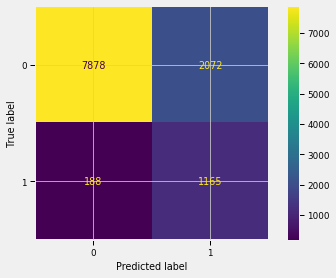

In [121]:
ConfusionMatrixDisplay.from_estimator(model_lgr, X_test, Y_test);

After testing different models, the inclusion of oversampling gives substancial improvements to the Logistic Regression model with an accuracy of 80%. The recall presents 86% of positive cases that were correctly identified which has proved to be the best method to overcome imbalanced data.

In [123]:
resultator.dashboard()

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [124]:
train_data.head()

age  education   balance  duration  campaign  previous  \
0  1.473637   1.316883  0.414773  0.386077 -1.108191   -0.4725   
1  0.429379  -0.180220 -0.410774 -0.223033 -1.108191   -0.4725   
2 -0.709873  -0.180220 -0.431122 -0.923854 -1.108191   -0.4725   
3  0.683128  -2.173137  0.197685 -0.735678 -1.108191   -0.4725   
4 -0.709873  -2.173137 -0.432119  0.072812 -1.108191   -0.4725   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0        -0.523740         -0.184415       -0.16793        1.944270   
1        -0.523740         -0.184415       -0.16793       -0.514332   
2        -0.523740          5.422561       -0.16793       -0.514332   
3         1.909346         -0.184415       -0.16793       -0.514332   
4        -0.523740         -0.184415       -0.16793       -0.514332   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0      -0.2296          -0.190234     -0.318082    -0.145557       -0.449414   
1      -0.2296          -0.190234     -0.318082    -0.145557        2.225121   
2      -0.2296          -0.190234     -0.318082    -0.145557       -0.449414   
3      -0.2296          -0.190234     -0.318082    -0.145557       -0.449414   
4      -0.2296          -0.190234     -0.318082    -0.145557       -0.449414   

   job_unemployed  job_unknown  marital_married  marital_single  default_yes  \
0       -0.172266    -0.080069         0.813212       -0.628090     -0.13549   
1       -0.172266    -0.080069        -1.229691        1.592128     -0.13549   
2       -0.172266    -0.080069         0.813212       -0.628090     -0.13549   
3       -0.172266    -0.080069         0.813212       -0.628090     -0.13549   
4       -0.172266    12.489301        -1.229691        1.592128     -0.13549   

   housing_yes  loan_yes  contact_telephone  contact_unknown  month_aug  \
0     0.893915 -0.436803          -0.262091         1.572395  -0.400409   
1     0.893915 -0.436803          -0.262091         1.572395  -0.400409   
2     0.893915  2.289359          -0.262091         1.572395  -0.400409   
3     0.893915 -0.436803          -0.262091         1.572395  -0.400409   
4    -1.118674 -0.436803          -0.262091         1.572395  -0.400409   

   month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
0  -0.068963  -0.249477  -0.178958  -0.424206  -0.366006  -0.103262   
1  -0.068963  -0.249477  -0.178958  -0.424206  -0.366006  -0.103262   
2  -0.068963  -0.249477  -0.178958  -0.424206  -0.366006  -0.103262   
3  -0.068963  -0.249477  -0.178958  -0.424206  -0.366006  -0.103262   
4  -0.068963  -0.249477  -0.178958  -0.424206  -0.366006  -0.103262   

   month_may  month_nov  month_oct  month_sep  
0   1.511374  -0.310263  -0.128819  -0.113898  
1   1.511374  -0.310263  -0.128819  -0.113898  
2   1.511374  -0.310263  -0.128819  -0.113898  
3   1.511374  -0.310263  -0.128819  -0.113898  
4   1.511374  -0.310263  -0.128819  -0.113898

In [125]:
train_y.head()

y
0  0
1  0
2  0
3  0
4  0

In [126]:
X_ROS, Y_ROS = ROS.fit_resample(train_data, train_y)

In [127]:
X_ROS.shape, Y_ROS.shape

((79844, 35), (79844, 1))

In [128]:
now = datetime.now()
model_lgr = GridSearchCV(
    LogisticRegression(C = 0.001, penalty = "l2", solver = "liblinear", random_state = 42),
    {},
    n_jobs=-1,
    cv=10,
    scoring=["recall", "accuracy", 'precision'],
    refit="recall"
)
model_lgr.fit(X_ROS, Y_ROS)
print(f"The model fitted in {datetime.now()-now} seconds")

The model fitted in 0:01:10.072087 seconds


In [129]:
pd.DataFrame(model_lgr.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time params  \
0       4.202312      0.647429         0.148456         0.13015     {}   

   split0_test_recall  split1_test_recall  split2_test_recall  \
0            0.833918            0.859469            0.854495   

   split3_test_recall  split4_test_recall  split5_test_recall  \
0            0.858502             0.85997            0.856713   

   split6_test_recall  split7_test_recall  split8_test_recall  \
0             0.87024            0.864729            0.855711   

   split9_test_recall  mean_test_recall  std_test_recall  rank_test_recall  \
0            0.866984          0.858073         0.009387                 1   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
0              0.884408              0.899436              0.721853   

   split3_test_accuracy  split4_test_accuracy  split5_test_accuracy  \
0               0.74665              0.822896              0.805611   

   split6_test_accuracy  split7_test_accuracy  split8_test_accuracy  \
0              0.663076              0.597695               0.71756   

   split9_test_accuracy  mean_test_accuracy  std_test_accuracy  \
0              0.660947            0.752013           0.094499   

   rank_test_accuracy  split0_test_precision  split1_test_precision  \
0                   1               0.927556               0.934114   

   split2_test_precision  split3_test_precision  split4_test_precision  \
0               0.675376               0.701596               0.800606   

   split5_test_precision  split6_test_precision  split7_test_precision  \
0               0.777273               0.615303               0.563684   

   split8_test_precision  split9_test_precision  mean_test_precision  \
0               0.670461               0.613979             0.727995   

   std_test_precision  rank_test_precision  
0            0.122263                    1

In [130]:
# Save model
joblib.dump(model_lgr, 'LogisticRegression.pkl')

['LogisticRegression.pkl']